<a href="https://colab.research.google.com/github/mrspirit69/python-lab1/blob/dev/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22lab_1_np_pandas_matplotlib%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [101]:
A = np.zeros((6, 3), dtype=int)
A[::2, ::2] = 1
A[1::2, 1::2] = 1

B = np.arange(1, 25).reshape(6, 4)
B[1::2] = B[1::2, ::-1]

np.random.seed(0)
C = np.random.randint(2, 11, size=(4, 3))

D = np.eye(4, dtype=int)

top = np.hstack((A, B))
bottom = np.hstack((C, D))
S = np.vstack((top, bottom))

F = np.zeros((10, 2), dtype=int)

G = np.hstack((S, F))

## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [102]:
def find_nearest_neighbour(X, a):
    return X.flat[np.abs(X - a).argmin()]

## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [103]:
A = np.array([
    [1, 2, 3, 4],
    [2, 1, 2, 3],
    [3, 2, 1, 2],
    [4, 3, 2, 1]
])
b = np.array([1, 0.5, 0.25, 0.125])
X = np.array([4, 3, 2, 1])

def very_strange_neural_network(A, b, X):
    A_squared = np.dot(A, A)
    first_transformation = np.dot(A_squared, X)
    result = np.dot(first_transformation, b)
    return result

print(very_strange_neural_network(A, b, X))

408.5


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [104]:
def find_deep_sea_area(M):
    return np.sum(M < -5)

def find_water_volume(M):
    return -np.sum(M[M < 0])

def find_max_height(M):
    return np.max(M)

In [105]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [106]:
def count_all_islands(a):
  differences = np.diff(a)
  return np.sum(differences == 1)

In [107]:
# можно подставить свой пример

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [108]:
def swap_mask_for_average(X, a):
  average = np.mean(X)
  mask = X > a
  X[mask] = average
  return X

In [109]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# простая проверка для примера выше
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

array([[-7, -3, -1,  0],
       [-4, -3,  1,  2],
       [-2,  0,  4,  2],
       [-1,  3,  2,  2]])

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [110]:
def count_trace_diff(M):
  main_diag_sum = np.trace(M)
  secondary_diag_sum = np.trace(np.fliplr(M))
  return main_diag_sum - secondary_diag_sum

In [111]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

3

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [112]:
def create_mountain(a):
  full_row = np.concatenate((a, a[::-1]))  # Создаем первый ряд симметричной матрицы
  mountain = full_row[:, None] + full_row[None, :]  # Сложение строк и столбцов
  return mountain

In [113]:
# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [114]:
def custom_blur(P, C):
    N, M = P.shape
    result = np.zeros((N - C + 1, M - C + 1))

    for i in range(N - C + 1):
        for j in range(M - C + 1):
            sub_matrix = P[i:i + C, j:j + C]
            result[i, j] = np.mean(sub_matrix)

    return result

In [115]:
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# Проверка
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))

print(custom_blur(P, kernel))

[[2.5 3.5 4.5]
 [6.5 7.5 8.5]]


## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [116]:
def check_successful_broadcast(*matrices):
    result_shape = matrices[0]
    for shape in matrices[1:]:
        max_len = max(len(result_shape), len(shape))
        result_shape = (1,) * (max_len - len(result_shape)) + result_shape
        shape = (1,) * (max_len - len(shape)) + shape

        for i in range(max_len):
            if result_shape[i] != shape[i] and result_shape[i] != 1 and shape[i] != 1:
                return False
    return True

In [117]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7)) == True
assert check_successful_broadcast((5, 6, 7), (5, 6), (1, 7)) == False
assert check_successful_broadcast((4, 3), (1, 3), (3,)) == True
assert check_successful_broadcast((2, 3), (3, 1), (3, 2)) == False

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [118]:
def pairwise_distances(A, B):
    return np.sqrt(((A[:, None, :] - B[None, :, :]) ** 2).sum(axis=2))

In [119]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[7, 8], [9, 10]])

pairwise_distances(A, B)

array([[ 8.48528137, 11.3137085 ],
       [ 5.65685425,  8.48528137],
       [ 2.82842712,  5.65685425]])

Объясни принцип работы этой одной строчки. Что именно происходит в ней?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>
  1.  A[:, None, :] и B[None, :, :]:
	•	A[:, None, :] добавляет новую ось для матрицы A, превращая её из формы (m, k) в (m, 1, k).
	•	B[None, :, :] добавляет новую ось для B, превращая её из (n, k) в (1, n, k).
	•	Это подготовка к broadcasting, чтобы можно было вычитать матрицы разной размерности.
  2.	A[:, None, :] - B[None, :, :]:
	•	Broadcasting делает возможным вычисление разности между всеми строками из A и всеми строками из B.
	•	Результирующая форма: (m, n, k), где для каждой пары строк (одна из A, другая из B) вычитаются соответствующие компоненты.
  3.	** 2:
	•	Каждый элемент разности возводим в квадрат.
  4.	.sum(axis=2):
	•	Суммируем квадраты разностей вдоль оси k (последняя ось), соответствующей компонентам строк.
	•	Результат: массив размера (m, n), где каждый элемент — это сумма квадратов разностей для определенной пары строк.
  5.	np.sqrt(...):
	•	Применяем квадратный корень ко всем элементам массива.

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [121]:
!gdown 1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq
data = pd.read_csv('/content/data_numpy_lab.csv').drop(columns=['Unnamed: 0'])

data.head()

Downloading...
From: https://drive.google.com/uc?id=1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq
To: /content/data_numpy_lab.csv
100% 876/876 [00:00<00:00, 2.81MB/s]


,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,4,268,1,180.0,121.0,0.16
1,4,264,1,180.0,121.0,0.18
2,4,275,1,180.0,121.0,0.16
3,4,263,1,180.0,121.0,0.17
4,4,267,1,180.0,121.0,0.17


## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [122]:
data.rename(columns={
    't, sec': 't',
    'sigma_t, sec': 'sigma_t',
    'mass, gramm': 'mass',
    'length, cm': 'length',
    'phi, rad': 'angle'
}, inplace=True)

data['mass'] = data['mass'] / 1000
data['length'] = data['length'] / 100

assert data.mass.mean() < 0.3
assert np.allclose(data.length.mean(), 1.155)
assert all(' ' not in column for column in data.columns)

data.head()

,N,t,sigma_t,mass,length,angle
0,4,268,1,0.18,1.21,0.16
1,4,264,1,0.18,1.21,0.18
2,4,275,1,0.18,1.21,0.16
3,4,263,1,0.18,1.21,0.17
4,4,267,1,0.18,1.21,0.17


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [123]:
g = 9.8

data['omega'] = 2 * np.pi * data['N'] / data['t']
data['sigma_omega'] = data['omega'] / data['t'] * data['sigma_t']
data['omega_down'] = data['angle'] / data['t']
data['sigma_down'] = data['omega_down'] * data['sigma_t'] / data['t']
data['momentum'] = data['mass'] * g * data['length']
data['momentum_down'] = data['mass'] * data['angle'] * data['length']**2 / data['t']**2
data['sigma_momentum'] = data['momentum_down'] * data['sigma_t'] / data['t']

assert np.allclose(data.momentum_down.iloc[0], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 2.2e-09, atol=5e-10)

data.head()

,N,t,sigma_t,mass,length,angle,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,4,268,1,0.18,1.21,0.16,0.093779,0.000350,0.000597,0.000002,2.13444,5.870751e-07,2.190579e-09
1,4,264,1,0.18,1.21,0.18,0.095200,0.000361,0.000682,0.000003,2.13444,6.806250e-07,2.578125e-09
2,4,275,1,0.18,1.21,0.16,0.091392,0.000332,0.000582,0.000002,2.13444,5.575680e-07,2.027520e-09
3,4,263,1,0.18,1.21,0.17,0.095562,0.000363,0.000646,0.000002,2.13444,6.477101e-07,2.462776e-09
4,4,267,1,0.18,1.21,0.17,0.094130,0.000353,0.000637,0.000002,2.13444,6.284484e-07,2.353739e-09


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [124]:
grouped_data = data.groupby('mass')[['omega', 'sigma_omega', 'momentum', 'momentum_down']].mean()

assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

,omega,sigma_omega,momentum,momentum_down
mass,,,,
0.142,0.066661,0.000236,1.683836,4.108862e-07
0.180,0.094012,0.000352,2.134440,6.202853e-07
0.216,0.081687,0.000354,2.286144,7.755223e-07
0.273,0.143300,0.000817,3.263988,2.166527e-06
0.341,0.150752,0.000723,3.675980,1.577406e-06
0.614,0.185194,0.000910,6.679092,3.030996e-06


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

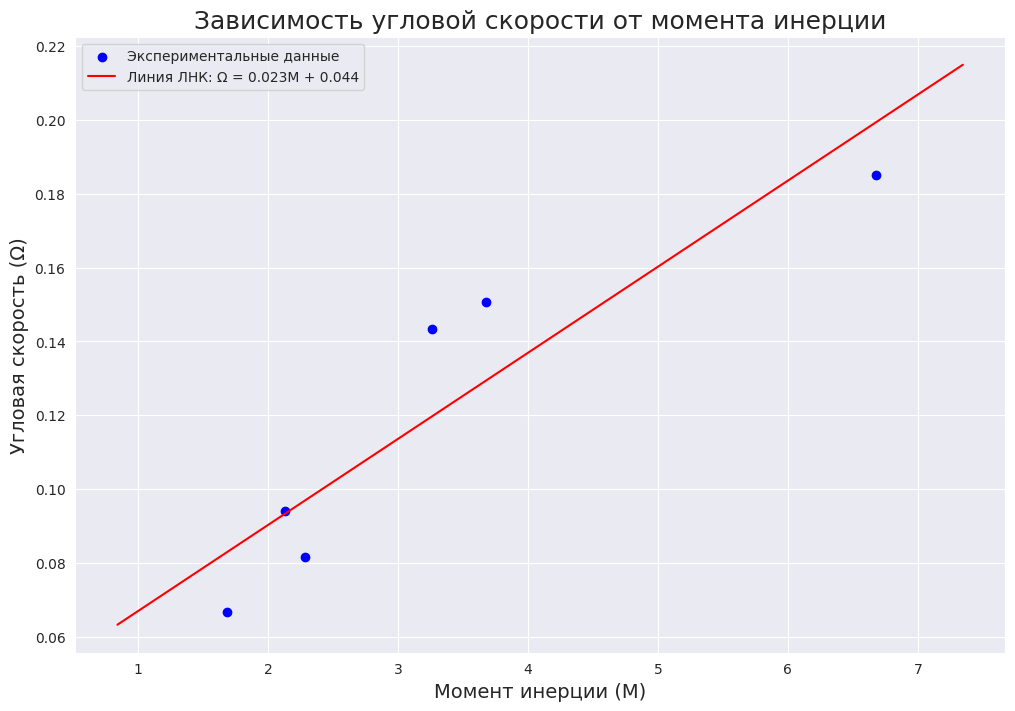

In [125]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

coefs = np.polyfit(momentum_np, omega_np, 1)

x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)

y_lsq = np.polyval(coefs, x_lsq)

fig = plt.figure(figsize=(12, 8))

plt.scatter(momentum_np, omega_np, color='blue', label='Экспериментальные данные')

plt.plot(x_lsq, y_lsq, color='red', label=f'Линия ЛНК: Ω = {coefs[0]:.3f}M + {coefs[1]:.3f}')

plt.xlabel('Момент инерции (M)', fontsize=14)
plt.ylabel('Угловая скорость (Ω)', fontsize=14)
plt.title('Зависимость угловой скорости от момента инерции', fontsize=18)

plt.grid(True)

plt.legend()

plt.show()

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [126]:
grouped_data = data.groupby('mass')[['sigma_down', 'sigma_momentum', 'omega_down', 'momentum_down']].mean()

grouped_data

,sigma_down,sigma_momentum,omega_down,momentum_down
mass,,,,
0.142,0.000002,1.453459e-09,0.000559,4.108862e-07
0.180,0.000002,2.322548e-09,0.000629,6.202853e-07
0.216,0.000003,3.360850e-09,0.000710,7.755223e-07
0.273,0.000005,1.235485e-08,0.000935,2.166527e-06
0.341,0.000004,7.570192e-09,0.000797,1.577406e-06
0.614,0.000004,1.489473e-08,0.000815,3.030996e-06


In [127]:
grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

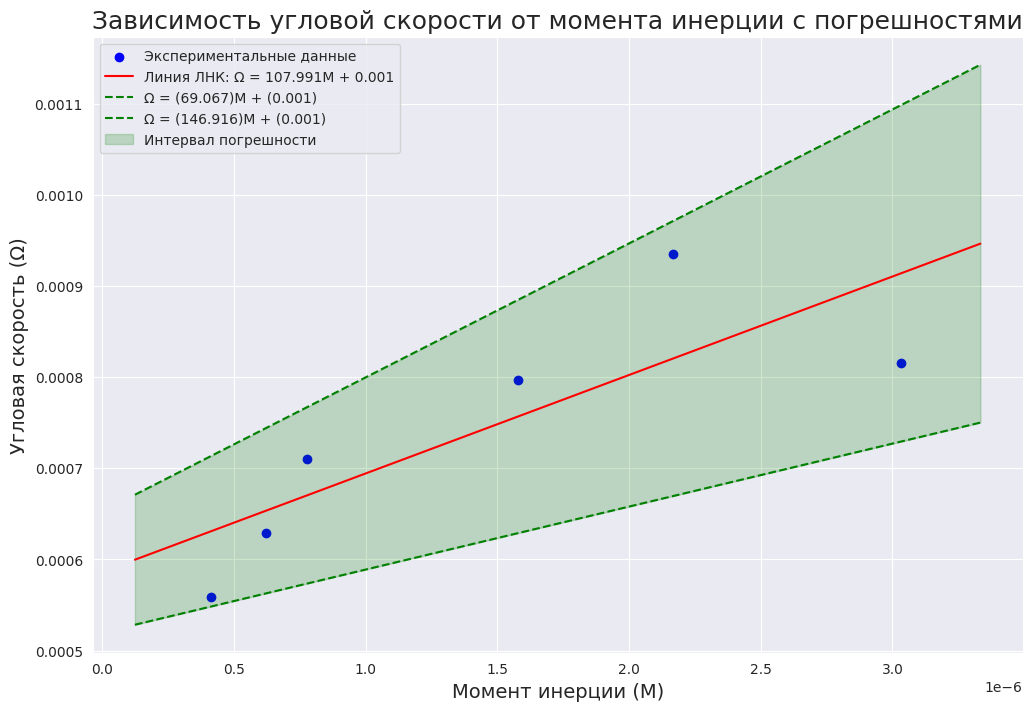

In [128]:
omega_down_np = np.array(grouped_data.omega_down)
momentum_down_np = np.array(grouped_data.momentum_down)

coefs, cov = np.polyfit(momentum_down_np, omega_down_np, 1, cov=True)

x_lsq = np.linspace(momentum_down_np.min() * 0.3, momentum_down_np.max() * 1.1, 100)

lsq_stds = np.sqrt(np.diag(cov))

y_lsq = np.polyval(coefs, x_lsq)
y_lsq_lower = np.polyval([coefs[0] - lsq_stds[0], coefs[1] - lsq_stds[1]], x_lsq)  # Линия с уменьшенными коэффициентами
y_lsq_upper = np.polyval([coefs[0] + lsq_stds[0], coefs[1] + lsq_stds[1]], x_lsq)  # Линия с увеличенными коэффициентами

fig = plt.figure(figsize=(12, 8))

plt.scatter(momentum_down_np, omega_down_np, color='blue', label='Экспериментальные данные')

plt.plot(x_lsq, y_lsq, color='red', label=f'Линия ЛНК: Ω = {coefs[0]:.3f}M + {coefs[1]:.3f}')

plt.plot(x_lsq, y_lsq_lower, color='green', linestyle='--', label=f'Ω = ({coefs[0] - lsq_stds[0]:.3f})M + ({coefs[1] - lsq_stds[1]:.3f})')

plt.plot(x_lsq, y_lsq_upper, color='green', linestyle='--', label=f'Ω = ({coefs[0] + lsq_stds[0]:.3f})M + ({coefs[1] + lsq_stds[1]:.3f})')

plt.fill_between(x_lsq, y_lsq_lower, y_lsq_upper, color='green', alpha=0.2, label='Интервал погрешности')

plt.xlabel('Момент инерции (M)', fontsize=14)
plt.ylabel('Угловая скорость (Ω)', fontsize=14)
plt.title('Зависимость угловой скорости от момента инерции с погрешностями', fontsize=18)

plt.grid(True)

plt.legend()

plt.show()

# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [129]:
sns.set_style("darkgrid")

In [130]:
from sklearn import datasets

iris_data = datasets.load_iris()

iris = pd.DataFrame(
    iris_data.data,
    columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
)

iris['Species'] = iris_data.target

target_names = {
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
}

iris['Species'] = iris['Species'].map(target_names)

iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [131]:
species_counts = iris['Species'].value_counts()
species_counts

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

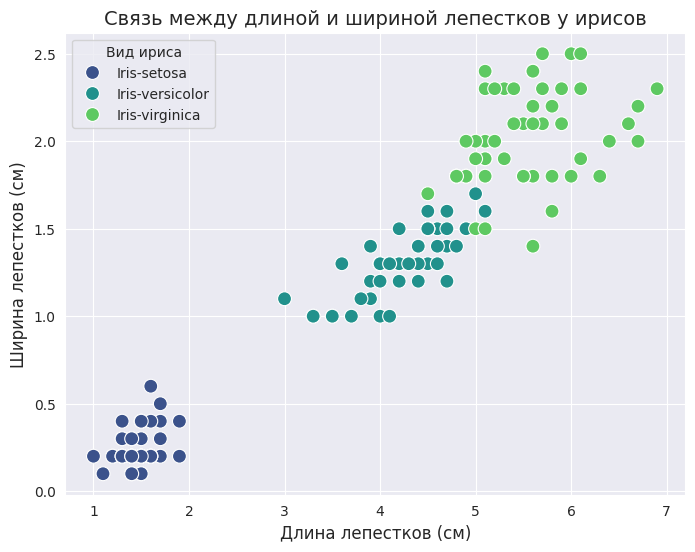

In [132]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=iris,
    x="PetalLengthCm",
    y="PetalWidthCm",
    hue="Species",
    palette="viridis",
    s=100
)

plt.title("Связь между длиной и шириной лепестков у ирисов", fontsize=14)
plt.xlabel("Длина лепестков (см)", fontsize=12)
plt.ylabel("Ширина лепестков (см)", fontsize=12)
plt.legend(title="Вид ириса")
plt.grid(True)
plt.show()

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='red'>ВАШ ОТВЕТ ЗДЕСЬ</font>

Выводы из графика:

1.	Видимое разделение классов:

•	У ирисов типа Iris-setosa длина и ширина лепестков меньше и четко отделены от двух других видов.

•	Iris-versicolor и Iris-virginica частично пересекаются, что может усложнить классификацию.

2.	Зависимость длины и ширины:

•	У всех видов ирисов длина лепестков положительно коррелирует с шириной.

3.	Характеристики видов:

•	Iris-setosa: Небольшая длина и ширина лепестков (длина до 2 см, ширина до 0.5 см).

•	Iris-versicolor: Средние значения длины и ширины.

•	Iris-virginica: Самые большие лепестки (длина до 7 см, ширина до 2.5 см).

Чего не хватает графику:

1.	Подписи данных:

•	Добавление примеров с реальными значениями (аннотации) для отдельных точек сделало бы график более информативным.

2.	Линии тренда:

•	Построение линейных регрессий для каждого класса помогло бы лучше понять зависимость между длиной и шириной лепестков.

3.	Указание чисел в легенде:

•	В легенде можно указать количество объектов каждого вида для полноты информации.

4.	Пояснения по цветам:

•	Было бы полезно, если бы описание цветов включало дополнительную информацию (например, среднее значение или диапазоны).

5.	Метки сетки:

•	Более детализированная шкала с указанием промежуточных значений по обеим осям может быть полезной.

6.	Дополнительный график:

•	Было бы полезно добавить гистограммы для каждого вида ирисов, чтобы отдельно показать распределение длины и ширины.


Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

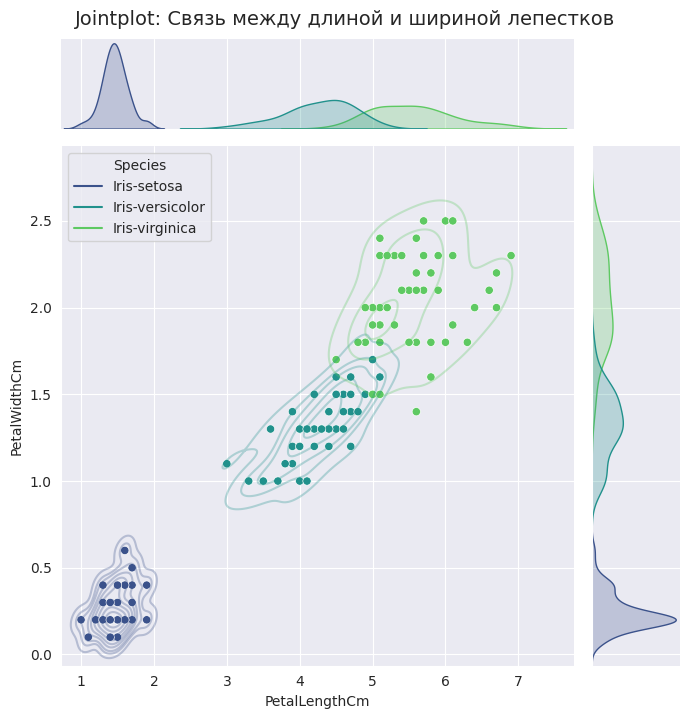

In [133]:
sns.jointplot(
    data=iris,
    x="PetalLengthCm",
    y="PetalWidthCm",
    hue="Species",
    kind="scatter",
    palette="viridis",
    height=7
).plot_joint(sns.kdeplot, alpha=0.3)

plt.suptitle("Jointplot: Связь между длиной и шириной лепестков", y=1.02, fontsize=14)
plt.show()

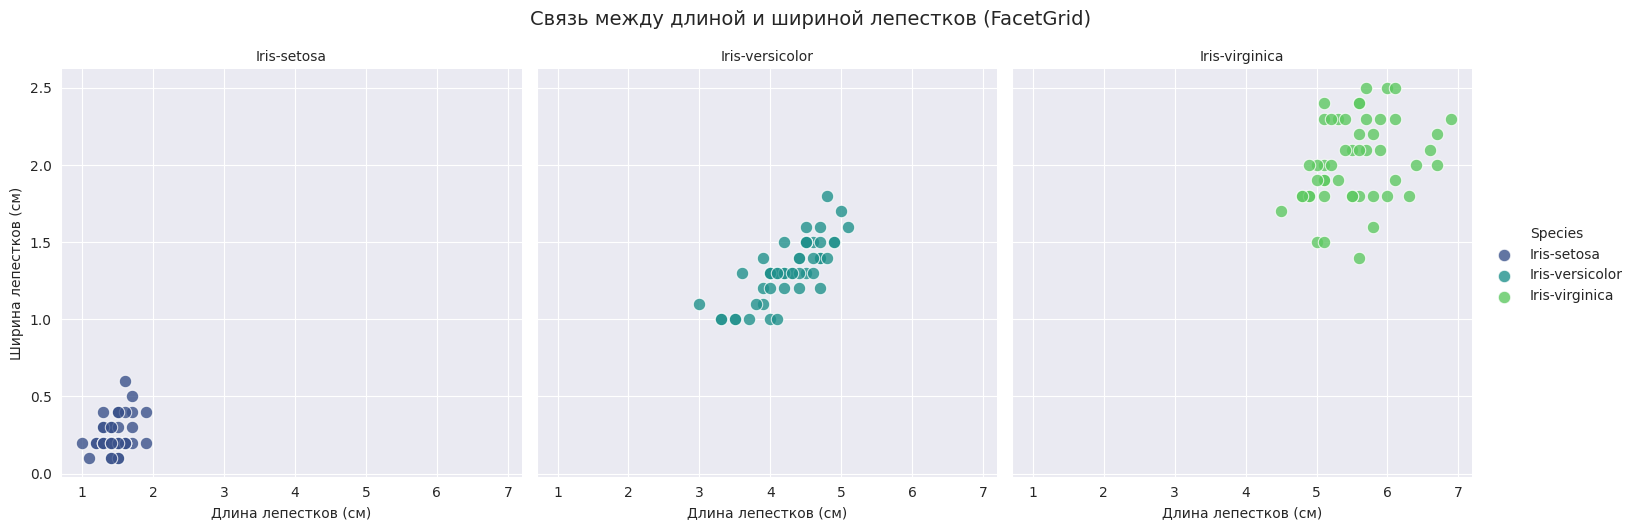

In [134]:
g = sns.FacetGrid(
    iris,
    col="Species",
    hue="Species",
    palette="viridis",
    height=5,
    col_wrap=3
)

g.map(sns.scatterplot, "PetalLengthCm", "PetalWidthCm", s=80, alpha=0.8)
g.set_axis_labels("Длина лепестков (см)", "Ширина лепестков (см)")
g.set_titles("{col_name}")
g.add_legend()

plt.suptitle("Связь между длиной и шириной лепестков (FacetGrid)", y=1.05, fontsize=14)
plt.show()

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

## Выводы:
1. **Iris-setosa** четко отделяется от других видов, его легко классифицировать.
2. **Iris-versicolor** и **Iris-virginica** частично перекрываются, что затрудняет их различение.
3. Длина и ширина лепестков линейно связаны.

### Сравнение методов:
- **`scatterplot`**: простой и понятный для общей картины.
- **`jointplot`**: добавляет распределение, помогает понять данные глубже.
- **`FacetGrid`**: удобно для сравнения видов по отдельности.

### Итог:
**`jointplot`** — лучший для общей аналитики, но для задач сравнения лучше **`FacetGrid`**.

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

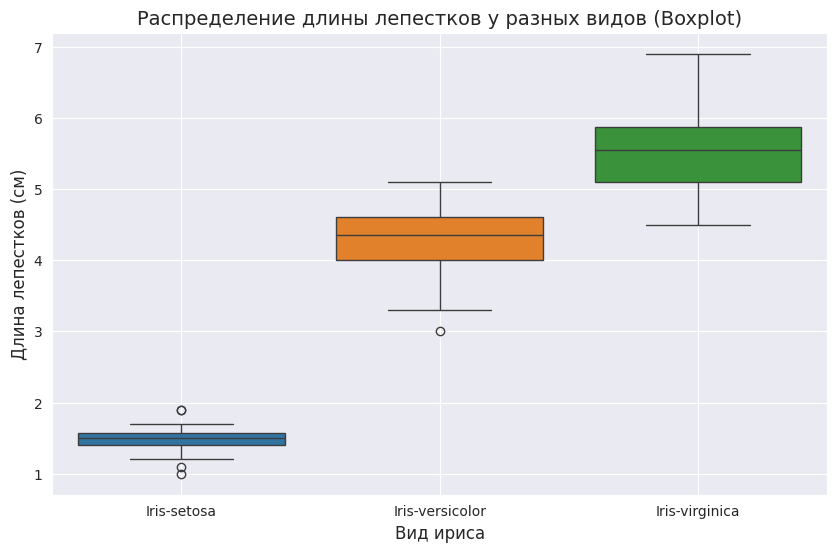

In [135]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=iris,
    x="Species",
    y="PetalLengthCm",
    hue="Species"
)
plt.title("Распределение длины лепестков у разных видов (Boxplot)", fontsize=14)
plt.xlabel("Вид ириса", fontsize=12)
plt.ylabel("Длина лепестков (см)", fontsize=12)
plt.grid(True)
plt.show()


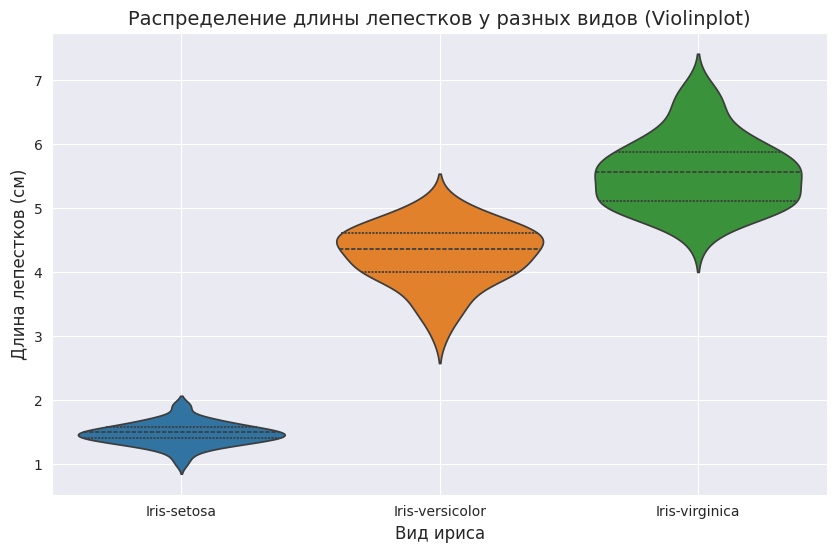

In [136]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=iris,
    x="Species",
    y="PetalLengthCm",
    hue="Species",
    inner="quartile"
)

plt.title("Распределение длины лепестков у разных видов (Violinplot)", fontsize=14)
plt.xlabel("Вид ириса", fontsize=12)
plt.ylabel("Длина лепестков (см)", fontsize=12)
plt.grid(True)
plt.show()


Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

- Boxplot лучше для понимания статистики и быстрого анализа.
- Violinplot более информативный по распределению данных, но сложнее для восприятия.

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

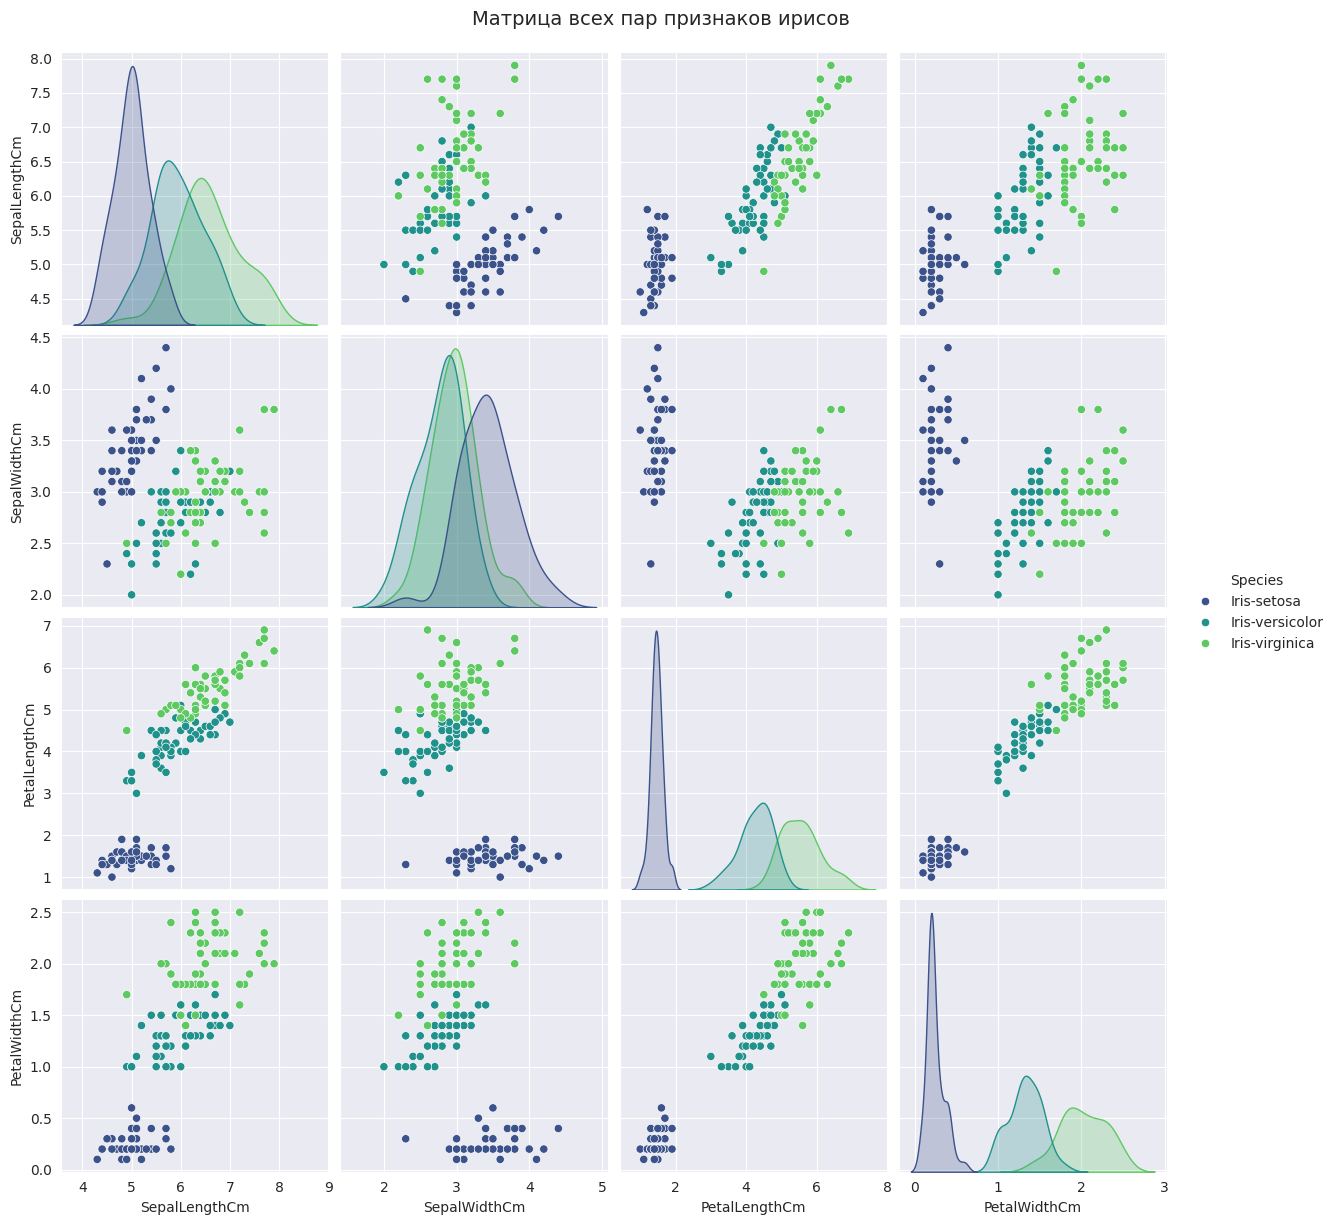

In [137]:
sns.pairplot(
    iris,
    hue="Species",
    palette="viridis",
    height=3
)

plt.suptitle("Матрица всех пар признаков ирисов", y=1.02, fontsize=14)
plt.show()

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

На графике видно следующее:
1. Iris-setosa легко отличить от других видов. У него самые маленькие лепестки и чашелистики, и его точки образуют отдельный кластер на всех графиках.
2.  Iris-versicolor и Iris-virginica частично пересекаются. Их сложнее разделить, но признаки лепестков (длина и ширина) помогают сделать это лучше, чем признаки чашелистиков.
3.  Между длиной и шириной лепестков есть сильная связь: с увеличением длины ширина тоже растет. У чашелистиков такая зависимость менее выражена.

Вывод:

Лепестки (их длина и ширина) — ключевые признаки для различения видов ирисов. Iris-setosa выделяется как отдельный вид, а для разделения Iris-versicolor и Iris-virginica нужно обращать внимание на параметры лепестков.

Какие графики находятся на диагонали этой таблицы?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

### Графики на диагонали:
- **Диагональ** содержит графики распределения (KDE) каждого признака, графики:
  - **SepalLengthCm**
  - **SepalWidthCm**
  - **PetalLengthCm**
  - **PetalWidthCm**

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

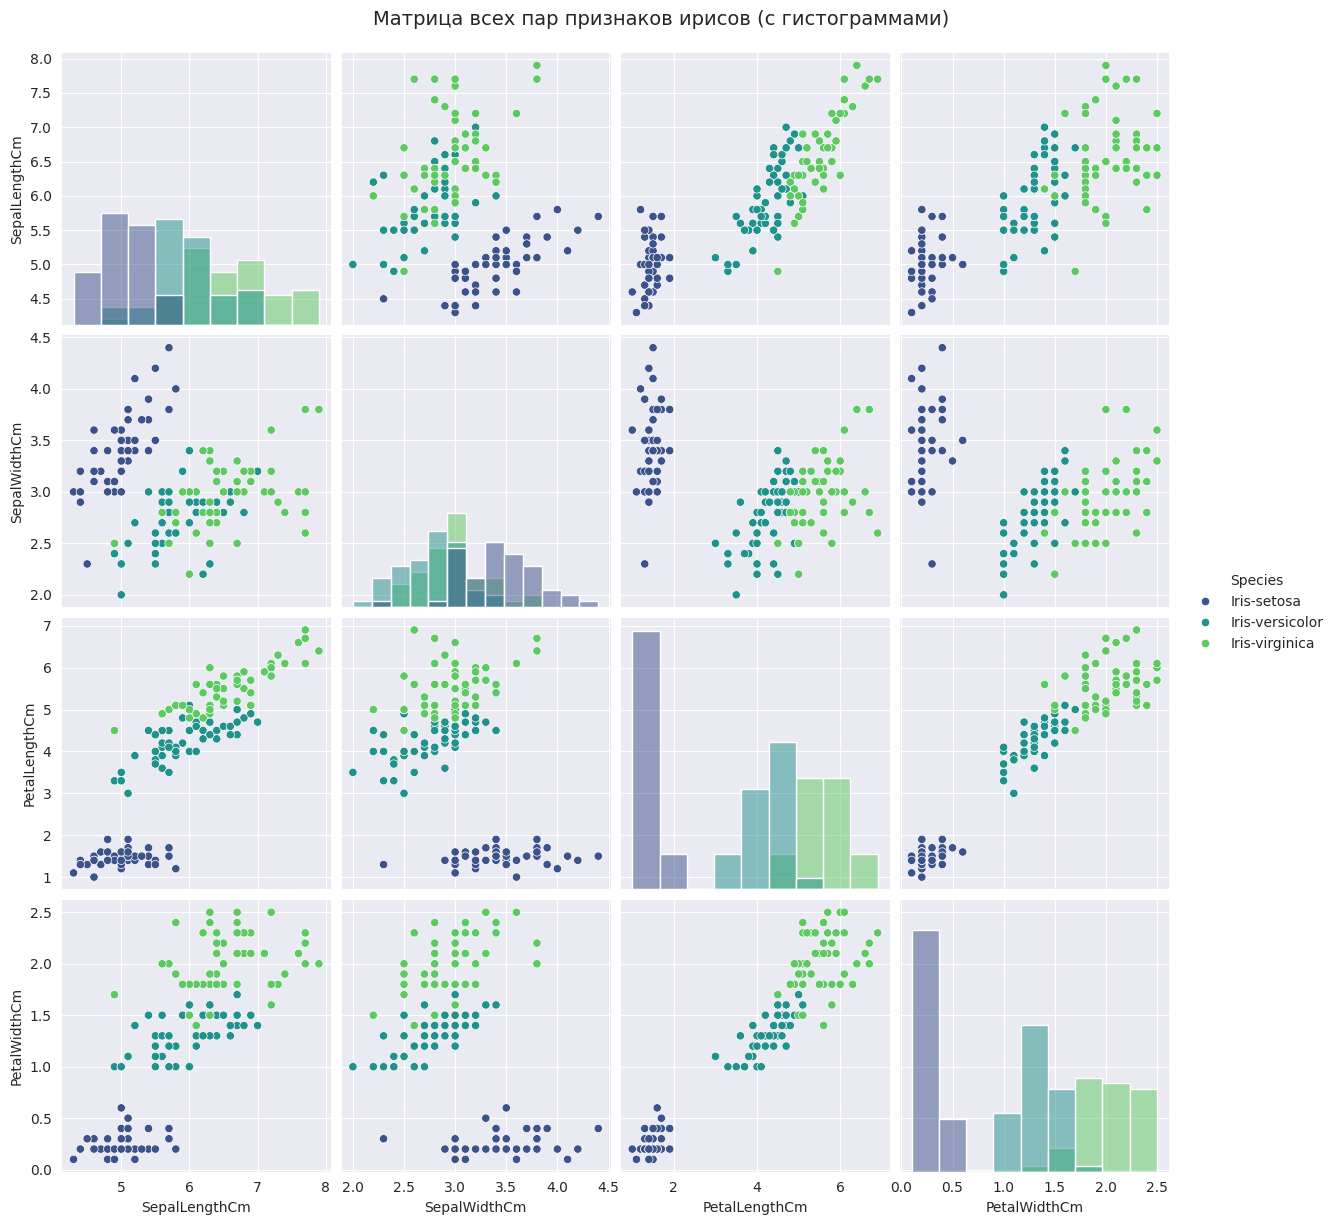

In [138]:
sns.pairplot(
    iris,
    hue="Species",
    palette="viridis",
    height=3,
    diag_kind='hist'
)

plt.suptitle("Матрица всех пар признаков ирисов (с гистограммами)", y=1.02, fontsize=14)
plt.show()

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Теперь на диагонали — **гистограммы**, которые показывают распределение каждого признака для разных видов ирисов. Это **более информативно**, так как гистограммы чётко показывают, как данные распределены по диапазонам значений, в отличие от графиков KDE, которые сглаживают информацию.